In [8]:
import os
from matplotlib import pyplot as plt

In [9]:
def parse_statistics(stats):
    stats_list = stats.strip().split(" ")
    stats_list = [float(x) for x in stats_list]
    return stats_list

In [10]:
def create_stats_dict(dir):
    directory_path = os.path.join(os.getcwd(), dir)
    path = os.walk(directory_path)

    stats_dir = {}

    for root, _, files in path:
        for file in files:
            if file.endswith(".txt"):
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    stats = f.readlines()[-1]
                    stats = parse_statistics(stats)
                    instance_number = int(file_path.split("/")[-1].split(".")[0].split("-")[-1])
                    stats_dir[instance_number] = stats[0]
    
    return stats_dir




In [11]:
def parse_stats_dict(stats_dict):
    stats_dict = {k: v for k, v in sorted(stats_dict.items(), key=lambda item: item[0])}
    keys = list(stats_dict.keys())
    values = list(stats_dict.values())
    return keys, values

In [12]:
model = 'VLSIdesign'
mip_dir = f"./out/rotation_True/not_break_symmetry"
mip_dir2 = f"./out/rotation_True/break_symmetry"
mip_dir3 = f"./out/rotation_False"

mip_stats = create_stats_dict(mip_dir)
mip_keys, mip_values = parse_stats_dict(mip_stats)

mip_stats2 = create_stats_dict(mip_dir2)
mip_keys2, mip_values2 = parse_stats_dict(mip_stats2)

mip_stats3 = create_stats_dict(mip_dir3)
mip_keys3, mip_values3 = parse_stats_dict(mip_stats3)



In [21]:
def plot_stats(keys, values, title, xlabel, ylabel):
    values = [[v for v in val if v!=300] for val in values]
    plt.plot(keys[2][:len(values[2])], values[2], label=f"Fixed position")
    plt.plot(keys[0][:len(values[0])], values[0], label=f"Rotate")
    plt.plot(keys[1][:len(values[1])], values[1], label=f"Rotate+break symmetry")
    #plt.plot(keys[0][:10], [300]*len(keys[0][:10]), label="time limit")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

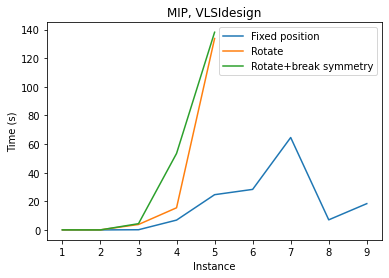

In [22]:
#plot_stats(cp_keys, cp_values, "CP", "Instance", "Time (s)")
#plot_stats(sat_keys, sat_values, f"SAT, {model}", "Instance", "Time (s)")
plot_stats([mip_keys, mip_keys2, mip_keys3], [mip_values, mip_values2, mip_values3], f"MIP, {model}", "Instance", "Time (s)")


In [15]:
def create_log_dict(dir):
    directory_path = os.path.join(os.getcwd(), dir)
    path = os.walk(directory_path)

    stats_dir = {}

    for root, _, files in path:
        for file in files:
            if file.endswith(".txt"):
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    lines = f.readlines()
                    enumerate_nodes = int(lines[-8].split(':')[-1].strip())
                    total_iterations = int(lines[-7].split(':')[-1].strip())
                    instance_number = int(file_path.split("/")[-1].split(".")[0].split("-")[-1])
                    stats_dir[instance_number] = {'enumerate_nodes': enumerate_nodes, 'total_iterations': total_iterations}
    
    return stats_dir
    

In [16]:
def parse_log_dict(stats_dict):
    enumerate_nodes = {k: v['enumerate_nodes'] for k, v in sorted(stats_dict.items(), key=lambda item: item[0])}
    total_iterations = {k: v['total_iterations'] for k, v in sorted(stats_dict.items(), key=lambda item: item[0])}
    
    keys_nodes = list(enumerate_nodes.keys())
    values_nodes = list(enumerate_nodes.values())
    keys_iterations = list(total_iterations.keys())
    values_iterations = list(total_iterations.values())

    return keys_nodes, values_nodes, keys_iterations, values_iterations

In [17]:
log_dict1 = create_log_dict('./MIP_logs/fixed_position')
keys_nodes1, values_nodes1, keys_iterations1, values_iterations1 = parse_log_dict(log_dict1)
log_dict2 = create_log_dict('./MIP_logs/rotation/notBS')
keys_nodes2, values_nodes2, keys_iterations2, values_iterations2 = parse_log_dict(log_dict2)
log_dict3 = create_log_dict('./MIP_logs/rotation/BS')
keys_nodes3, values_nodes3, keys_iterations3, values_iterations3 = parse_log_dict(log_dict3)

In [18]:
def plot_log(keys, values, title, xlabel, ylabel):
    plt.plot(keys[0][:len(values[0])], values[0], label=f"Fixed position")
    plt.plot(keys[1][:len(values[1])], values[1], label=f"Rotate")
    plt.plot(keys[2][:len(values[2])], values[2], label=f"Rotate+break symmetry")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

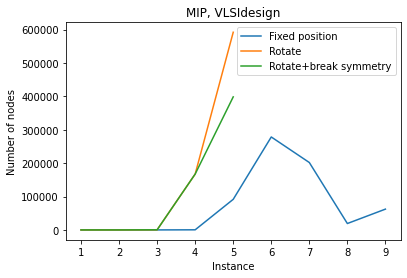

In [19]:
plot_log([keys_nodes1, keys_nodes2, keys_nodes3], [values_nodes1, values_nodes2, values_nodes3], f"MIP, {model}", "Instance", "Number of nodes")


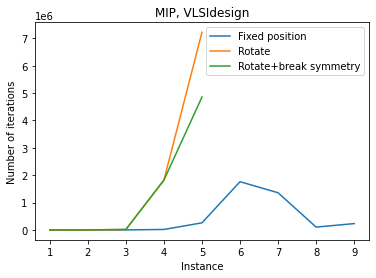

In [20]:
plot_log([keys_iterations1, keys_iterations2, keys_iterations3], [values_iterations1, values_iterations2, values_iterations3], f"MIP, {model}", "Instance", "Number of iterations")
